In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("../datasets/mnist_train_small.csv").values

In [3]:
X = data[:,2:]
y= data[:,1]

In [4]:
pca=PCA()

In [5]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
pca.components_.shape

(784, 784)

In [7]:
X_dash = np.dot(X,pca.components_.T)

In [8]:
img = X_dash[0].reshape(28,28)

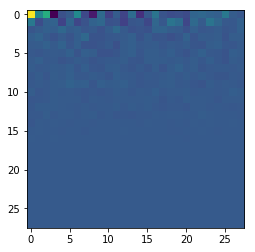

In [9]:
plt.imshow(img)

In [10]:
pca.explained_variance_

array([3.47160949e+05, 2.48680788e+05, 2.10203822e+05, 1.85325381e+05,
       1.63463586e+05, 1.51506406e+05, 1.13200808e+05, 9.95706732e+04,
       9.28782028e+04, 7.95919516e+04, 7.26677437e+04, 6.97845712e+04,
       5.79234336e+04, 5.69984749e+04, 5.53734186e+04, 5.24813567e+04,
       4.39207338e+04, 4.30383198e+04, 4.00234505e+04, 3.86249473e+04,
       3.49358101e+04, 3.44652286e+04, 3.24171419e+04, 3.17990677e+04,
       2.95300197e+04, 2.91714867e+04, 2.75717762e+04, 2.62383727e+04,
       2.48702178e+04, 2.34407640e+04, 2.26044025e+04, 2.13893092e+04,
       2.03798697e+04, 1.99867910e+04, 1.86926821e+04, 1.82037160e+04,
       1.76184616e+04, 1.65427579e+04, 1.61336649e+04, 1.57727281e+04,
       1.53127633e+04, 1.44902112e+04, 1.39781876e+04, 1.38879373e+04,
       1.28559974e+04, 1.24874564e+04, 1.18331506e+04, 1.17262190e+04,
       1.12857916e+04, 1.11596077e+04, 1.10204398e+04, 1.07934652e+04,
       1.00412076e+04, 9.70900432e+03, 9.55380326e+03, 9.33615596e+03,
      

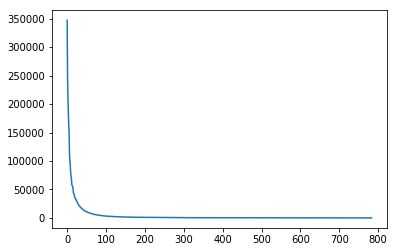

In [11]:
plt.plot(pca.explained_variance_)

In [12]:
np.sum(pca.explained_variance_ > 10000)

53

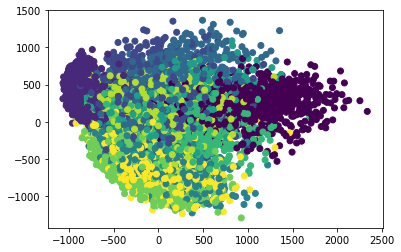

In [24]:
plt.scatter(X_mod[:,0],X_mod[:,1],c=y)

In [13]:
pca2 = PCA(n_components=2)

In [14]:
X_mod = pca2.fit_transform(X)

In [35]:
X_select = X_mod[y < 3]
y_select = y[y < 3]

In [36]:
X_select.shape

(2490, 2)

In [37]:
colors = ["red","green","yellow","blue"]

In [40]:
y_col = list(map(lambda X: colors[X-4],y_select))

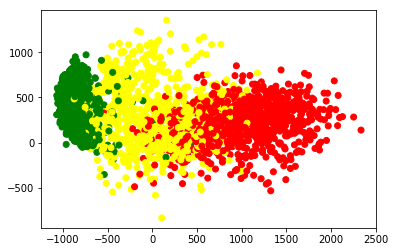

In [41]:
plt.scatter(X_select[:,0],X_select[:,1],c=y_col)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
model = KNeighborsClassifier(5)

In [21]:
model.fit(X_select,y_select)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
model.score(X_select,y_select)

0.8971887550200803

In [42]:
pca3 = PCA(n_components=30)

In [43]:
X_res = pca3.fit_transform(X)

In [44]:
model2 = KNeighborsClassifier(5)

In [45]:
model2.fit(X_res,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
model2.score(X_res,y)

0.973625